# Proejct 1: Edge Detection/Hough Transform

### What to Submit
Submit this iPython Notebook--containing all your code for the programming exercises below--on [learning suite](https://learningsuite.byu.edu/).

Your notebook file should produce the relevant plots and also provide a short write-up with answers to the questions in parts A-B.

Please also fill in here the time that each part took you:
* A1. Gradient Magnitude: <span style="color:red;">About 1 hour</span>
* A2. Gradient Orientation: <span style="color:red;">About 30 minutes</span>
* A3. Laplacian Zero-crossings: <span style="color:red;">About 30 minutes</span>
* A4. Gradient Magnitude + Zero-crossings: <span style="color:red;">About 30 minutes</span>
* B. Hough Transform (Circles):  <span style="color:red;">About 7 hours</span>

Note that the images referred to and needed for this project are contained in the zip file provided (in the same directory as this notebook file).  <i>Please use the files as though they are in the same directory.  We will drop your notebook file into our folder and run it.</i>

### Programming Exercises
Make sure to read through all of the assignment and plan accordingly.  The first part is relatively easy, but you should allow adequate time for the second part.

The main goal is to investigate edge detection and the Hough transform as discussed in Sections 4.2 and 4.3 of [Szeliski](http://szeliski.org/Book "Computer Vision: Algorithms and Applications").

#### Part A: Edge Detection (32 points)
For each of the following four parts, try out your code first on the <span style="color:orange;">2D_White_Box.png</span> image, then on the more complicated <span style="color:orange;">blocks.png</span> image.

Note: Many of the images will contain negative numbers or numbers larger than 255.  Make sure you approprately scale the output images to display all of the information.  Hint: try mapping negative values to [0,128) and positive values to (128,255].

2D_White_Box.png:
![alt 2D_White_Box.png](2D_White_Box.png)

blocks.png:
![alt blocks.png](blocks.png)

<br><br><b>A1. Gradient Magnitude</b> - Compute the gradient magnitude image for a grayscale image.  Apply a suitable threshold to find edge points--play with the threshold to find the "best" solution.  How well does this seem to work?  Feel free to use any preprocessing you wish to prior to edge detection.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = [15,8]
plt.rcParams['axes.titlesize'] = '16'
plt.rcParams['axes.titleweight'] = 'bold'

import cv2

def just_title(title):
    a = plt.gca()
    a.set_title(title, fontdict={'fontsize': plt.rcParams['axes.titlesize'],
                                 'fontweight' : plt.rcParams['axes.titleweight'],
                                 'verticalalignment': 'baseline',
                                 'horizontalalignment': 'center'})
    a.set_xticks([])
    a.set_yticks([])

In [3]:
def median_filter(image, width=3, height=3):    
    return cv2.medianBlur(image, width, height)

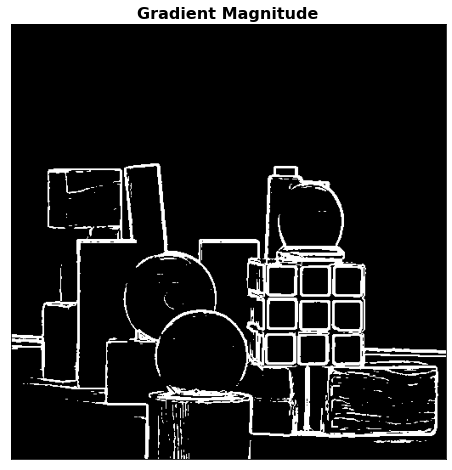

In [4]:
# Part 1. Compute the Gradient Magnitude
def gradient_magnitude(image, threshold=60):
    # Preprocess the image
    preprocessed_image = median_filter(image)

    # Use Sobel kernels to find partial derivatives with respect to x and y
    kernel_dx = np.array([[-1, 0, 1],
                          [-2, 0, 2],
                          [-1, 0, 1]])

    kernel_dy = np.array([[-1, -2, -1],
                          [0, 0, 0],
                          [1, 2, 1]])

    ddepth = cv2.CV_32F
    dx = cv2.filter2D(preprocessed_image, ddepth, kernel_dx)
    dy = cv2.filter2D(preprocessed_image, ddepth, kernel_dy)

    # Calculate the magnitude of the gradient
    magnitude = (dx ** 2 + dy ** 2) ** 0.5

    # Apply magnitude threshold
    magnitude = magnitude > threshold
    magnitude = np.where(magnitude > 0, 255, magnitude)

    return magnitude

# Show your results on the blocks image
image = cv2.imread('./blocks.png')

magnitude = gradient_magnitude(image)

plt.imshow(magnitude)
just_title('Gradient Magnitude')

<br><b>A2. Gradient Orientation</b> - Compute a gradient orientation image for a grayscale image.  Encode the orientations as intensity using any method you wish. (Just make sure to document it.)  Hint: use atan2(), not atan(), to do the angle calculation.

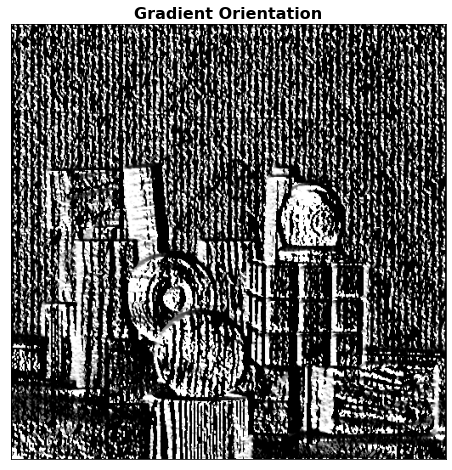

In [5]:
# Part 2. Compute the Gradient Orientation
def gradient_orientation(image):
    # Preprocess the image
    preprocessed_image = median_filter(image)

    # Use Sobel kernels to find partial derivatives with respect to x and y
    kernel_dx = np.array([[-1, 0, 1],
                          [-2, 0, 2],
                          [-1, 0, 1]])

    kernel_dy = np.array([[-1, -2, -1],
                          [0, 0, 0],
                          [1, 2, 1]])

    dx = cv2.filter2D(preprocessed_image, -1, kernel_dx)
    dy = cv2.filter2D(preprocessed_image, -1, kernel_dy)

    # Calculate the orientation of the gradient
    orientation = np.arctan2(dx, dy)

    # Scale the values so they are between 0 and 255
    min_val = np.min(orientation)
    max_val = np.max(orientation)
    val_range = max_val - min_val
    orientation = (orientation / val_range) * 255

    return orientation.astype(int)

# Show your results on the blocks image
image = cv2.imread('./blocks.png')

orientation = gradient_orientation(image)

plt.imshow(orientation)
just_title('Gradient Orientation')

<br><b>A3. Laplacian Zero-Crossings</b> - Apply a 3x3 Laplacian kernel to blocks and find the zero crossings.



In [6]:
def blur_uniform(image, kwidth, kheight):
    kernel = np.ones((kwidth, kheight), np.float32) / (kwidth * kheight)

    return cv2.filter2D(image, -1, kernel)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


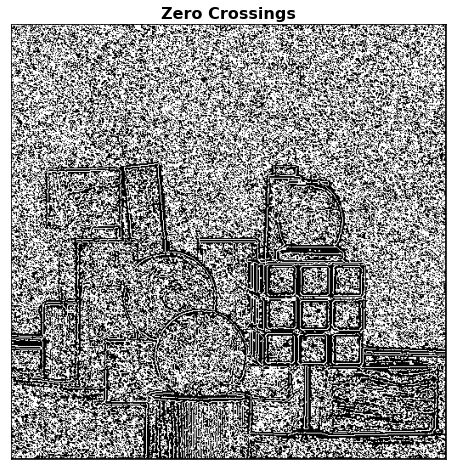

In [7]:
# Part 3. Find the Zero Crossings
def zero_crossings(image):
    # Preprocess the image
    preprocessed_image = blur_uniform(image, 3, 3)

    # Use Laplacian kernel
    kernel = np.array([[0, 1, 0],
                       [1, -4, 1],
                       [0, 1, 0]])

    ddepth = cv2.CV_32F
    filtered_image = cv2.filter2D(preprocessed_image, ddepth, kernel)
    
    zero_cross = np.zeros(filtered_image.shape)

    # Find the zero crossings; probably a better way to do this, but in the interest of time this works alright
    for i in range(0, filtered_image.shape[0] - 1):
        for j in range(0, filtered_image.shape[1] - 1):
            if filtered_image[i][j][0] > 0:
                if image[i + 1][j][0] < 0 or filtered_image[i + 1][j + 1][0] < 0 or filtered_image[i][j + 1][0] < 0:
                    zero_cross[i][j] = np.array([255, 255, 255])

            elif filtered_image[i][j][0] < 0:
                if filtered_image[i + 1][j][0] > 0 or filtered_image[i + 1][j + 1][0] > 0 or filtered_image[i][j + 1][0] > 0:
                    zero_cross[i][j] = np.array([255, 255, 255])

    return zero_cross

# Show your results on the blocks image
image = cv2.imread('./blocks.png')

zero_cross = zero_crossings(image)

plt.imshow(zero_cross)
just_title('Zero Crossings')

<br><b>A4. Combine Gradient Magnitude and Zero-Crossings</b> - Use the gradient magnitude image computed in item 1 to select Laplacian zero-crossings in part 3 that correspond to points with gradients higher than some threshold that you determine.  Adjust your threshold to find the best solution.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


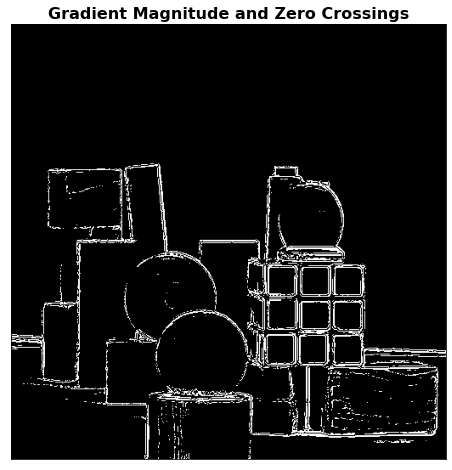

In [8]:
# Part 4. Final Solution
def magnitude_zero_cross(image):
    # Get the gradient magnitude and zero cross images
    magnitude = gradient_magnitude(image, threshold=60)
    zero_cross = zero_crossings(image)

    # Filter the image
    final_image = np.zeros(magnitude.shape)

    for i in range(magnitude.shape[0]):
        for j in range(magnitude.shape[1]):
            # If the magnitude is above the threshold and there is a zero cross, classify as an edge
            if magnitude[i][j][0] > 0 and zero_cross[i][j][0] == 0:
                final_image[i][j] = np.array([255, 255, 255])

            else:
                final_image[i][j] = np.array([0, 0, 0])

    return final_image


# Show the results on blocks image
image = cv2.imread('./blocks.png')

final_image = magnitude_zero_cross(image)

plt.imshow(final_image)
just_title('Gradient Magnitude and Zero Crossings')

##### Part A: Write-up

<span style="color:red">Please describe your results here and any questions, etc. above.</span>



##### For preprocessing in part A1 I used a median filter (just reused the code I had from the first learning lab).  I also played around with different threshold values and found that around 60 seemed to be the best (at least in my opinon).  Overall the results appear to be decent.  On part A2, for the intensity orientation I found the min and max values after using np.arctan2 to calculate the orientation, calculated the range between those two values, and then scaled each orientation value to something between 0 and 255 based on where their value fell within the range.  For part A3 I used a uniform blur and then the Laplacian filter; after that I iterated through the filtered image and classified a zero crossing or zero value as a 255 pixel value and a 0 pixel value otherwise.  For part A4 I used my functions from A1 and A3 to find the gradient magnitude and zero crossing images.  I then iterated through those images and if they both had a 255 value in the same location I would use a 255 pixel value, otherwise I would use a 0 pixel value.  For the final part I again found that a threshold of about 60 still seemed to look the best, though with the combination of the zero crossings it looks slightly better than the original magnitude image (the grain in the wood is less apparent).

<br><br><br>
#### Part B: Hough Transform (68 points)
Use the Hough transform to find all of the circular shapes in a color image.  They occur in three (approximate) sizes: 32, 64, and 96 pixels in diameter.  Try it out first on the simple <span style="color:orange;">simplecircle.png</span> image, then on the more complicated <span style="color:orange;">circles.png</span> image.

After finding maxima in the accumulator(s), write out a list of positions and sizes (small, medium, or large) for each circle.  Be aware that for some of the circles the center is outside the image--you should still be able to identify where it is.

Some of the cases are tricky--don't panic if you don't get them all at first. Keep trying to get as many as possible while generatign as few possible false positives (erroneous identifications).

About 40 of the 68 points will be on how many of the circles you can detect (1-2 false positives are okay). To know what you should be shooting for, there are:
* 5 small circles (blue/cyan, light gray, purple clipped on the left, two eyes of the pumpkin).
* 12 medium circles (green one in the top left corner, orange/magenta/pink near top/left, yello, magenta, purple/cyan, medium grey in "target", med blue clipped on the left, red/white/blue on lower right).
* 3 Large circles (black in target, black/dark blue on right, and orange pumpkin).

For the <span style="color:orange;">circles.png</span> file, and each of the 3 diameters, show (1) the accumulation array and (2) the <span style="color:orange;">circles.png</span> with the detected circles outlined.  This would be a total of 6 figures (3 diameters with two plots each).

This will be graded based on how well your method performs and how innovative your solution is. **In the write-up, describe any improvements/optimizations you made from the vanilla Hough transform**.

simplecircle.png:
![alt simplecircle.png](simplecircle.png)
circles.png:
![alt circles.png](circles.png)

In [9]:
# Part B - Hough Transform - code below
def preprocess_image(img, threshold):
    # Get the different color channels
    blue, green, red = img[:,:,0], img[:,:,1], img[:,:,2]

    # Compute averages between the color channels
    blue_green_avg = ((blue + green) / 2).astype(np.float32)
    blue_red_avg = ((blue + red) / 2).astype(np.float32)
    green_red_avg = ((green + red) / 2).astype(np.float32)

    # Use the color channels and the averages between them as images for edge detection
    images = [blue, green, red, blue_green_avg, blue_red_avg, green_red_avg]
    magnitudes = []

    for image in images:
        # Use a gaussian filter to blur the image - using CV2's implementation here for simplicity
        # because the TA told us we were allowed to (see Discord channel for Project 1)
        filtered_image = cv2.GaussianBlur(image, (5, 5), 0)

        # Use Sobel kernels and magnitude threshold for edge detection - using CV2's implementation here
        # for simplicity since I already implemented it in part A of this lab
        ddepth = cv2.CV_32F
        dx = cv2.Sobel(filtered_image, ddepth, 1, 0)
        dy = cv2.Sobel(filtered_image, ddepth, 0, 1)

        # Similar to part A, calculate the magnitude and use a threshold
        magnitude = (dx ** 2 + dy ** 2) ** 0.5

        magnitude = magnitude > threshold
        magnitude = np.where(magnitude > 0, 255, magnitude)

        magnitudes.append(magnitude)

    return magnitudes

def hough_circle_detection(edge_image, radius, vote_cutoff=100):
    # ------------------------------------------------------------
    # For this section of the function, I calculate x, y circle coordinates before iterating through
    # the edge points - used to speed up the calculation
    # ------------------------------------------------------------
    n_angles = 360
    
    # Using degrees (0 to 360) but then I convert them to radians since np.cos and np.sin use radians
    angles = np.arange(0, 360, step=int(360 / n_angles))
    
    # Calculate the sine and cosine values
    sin_angles = np.sin(np.deg2rad(angles))
    cos_angles = np.cos(np.deg2rad(angles))
    
    # Use the forumla posted on the Discord channel (x = radius * cosine(angle) and y = radius * sine(angle))
    circle_candidates = []
    
    for t in range(n_angles):
        circle_candidates.append((int(radius * cos_angles[t]), int(radius * sin_angles[t])))
    # ------------------------------------------------------------
    # ------------------------------------------------------------
    # ------------------------------------------------------------
    
    # Use a 2D array as the accumlator, with all the values (vote counts) initialized to 0
    accumulator = np.zeros(edge_image.shape)
    
    # With images height comes first and then width
    for y in range(edge_image.shape[0]):
        for x in range(edge_image.shape[1]):
            if edge_image[y][x] > 0:
                # Use the precalculated circle coordinates and shift them by the current x, y
                # coordinates to find a potential center coordinate
                for radius_cos_t, radius_sin_t in circle_candidates:
                    x_center = x - radius_cos_t
                    y_center = y - radius_sin_t

                    # If we are out of bounds, skip
                    if x_center > 255 or x_center < 0 or y_center > 255 or y_center < 0:
                        continue

                    # Otherwise, increment the accumulator at the potential center (add another "vote")
                    accumulator[y_center][x_center] += 1

    # Build up an array of x, y center points for the circles which have the highest votes 
    detected_circles = []

    for y in range(accumulator.shape[0]):
        for x in range(accumulator.shape[1]):
            if accumulator[y][x] >= vote_cutoff: 
                detected_circles.append((x, y))
    
    return detected_circles, accumulator

img = cv2.imread('./circles.png')

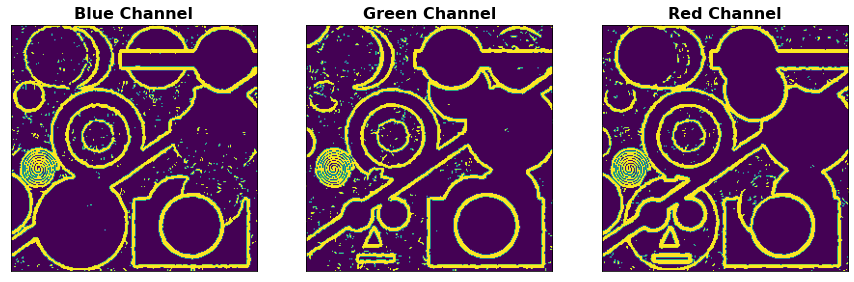

In [10]:
# EDGE DETECTION IMAGES - AS A SANITY CHECK FOR MYSELF
edges = preprocess_image(img, 100)

plt.subplot(131)
plt.imshow(edges[0])
just_title('Blue Channel')

plt.subplot(132)
plt.imshow(edges[1])
just_title('Green Channel')

plt.subplot(133)
plt.imshow(edges[2])
just_title('Red Channel')

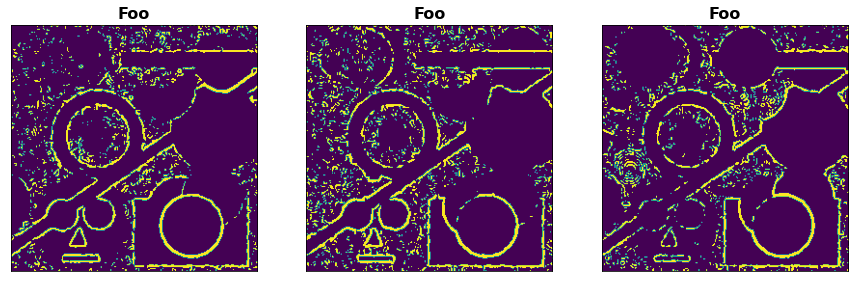

In [11]:
plt.subplot(131)
plt.imshow(edges[3])
just_title('Foo')

plt.subplot(132)
plt.imshow(edges[4])
just_title('Foo')

plt.subplot(133)
plt.imshow(edges[5])
just_title('Foo')

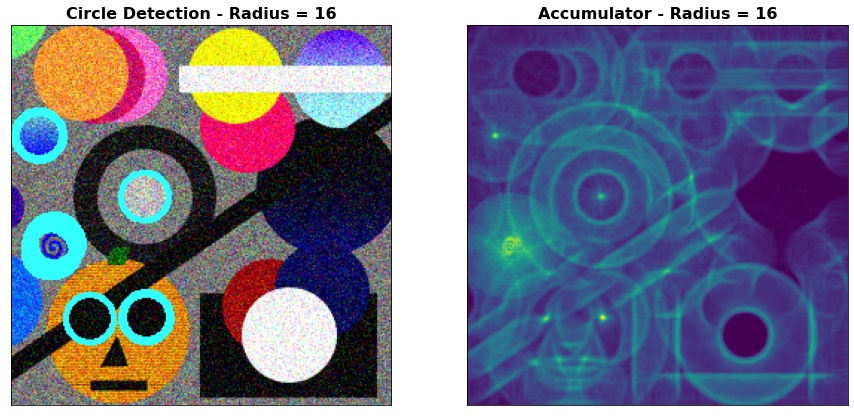

In [12]:
# RGB for circle color - used for drawing circles over the original image
circle_color = (254, 254, 51)

radius = 16
edges = preprocess_image(img, 100)

circles = []
accumulator = np.zeros(edges[0].shape)

for edge in edges:
    chosen_circles, edge_accumulator = hough_circle_detection(edge, radius, vote_cutoff=280)
    circles.append(chosen_circles)
    accumulator += edge_accumulator

# Scale the accumulator values down so that they are between 0 and 255
accumulator = ((accumulator - np.min(accumulator)) * (255 / (np.max(accumulator) - np.min(accumulator))))

final_image = img.copy()

for out_circles in circles:
    for x, y in out_circles:
        final_image = cv2.circle(final_image, (x,y), radius, circle_color, 2)
  
plt.subplot(121)
plt.imshow(cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB))
just_title('Circle Detection - Radius = ' + str(radius))

plt.subplot(122)
plt.imshow(accumulator)
just_title('Accumulator - Radius = ' + str(radius))

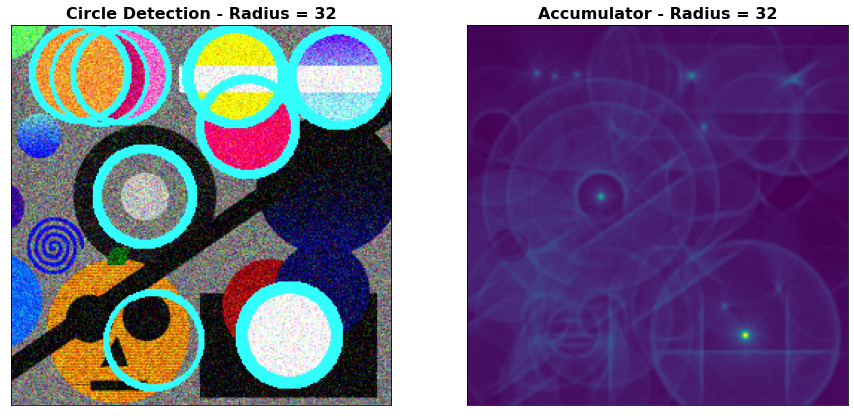

In [13]:
radius = 32
edges = preprocess_image(img, 150)

circles = []
accumulator = np.zeros(edges[0].shape)

for edge in edges:
    chosen_circles, edge_accumulator = hough_circle_detection(edge, radius, vote_cutoff=183)
    circles.append(chosen_circles)
    accumulator += edge_accumulator

# Scale the accumulator values down so that they are between 0 and 255
accumulator = ((accumulator - np.min(accumulator)) * (255 / (np.max(accumulator) - np.min(accumulator))))

final_image = img.copy()

for out_circles in circles:
    for x, y in out_circles:
        final_image = cv2.circle(final_image, (x,y), radius, circle_color, 2)
  
plt.subplot(121)
plt.imshow(cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB))
just_title('Circle Detection - Radius = ' + str(radius))

plt.subplot(122)
plt.imshow(accumulator)
just_title('Accumulator - Radius = ' + str(radius))

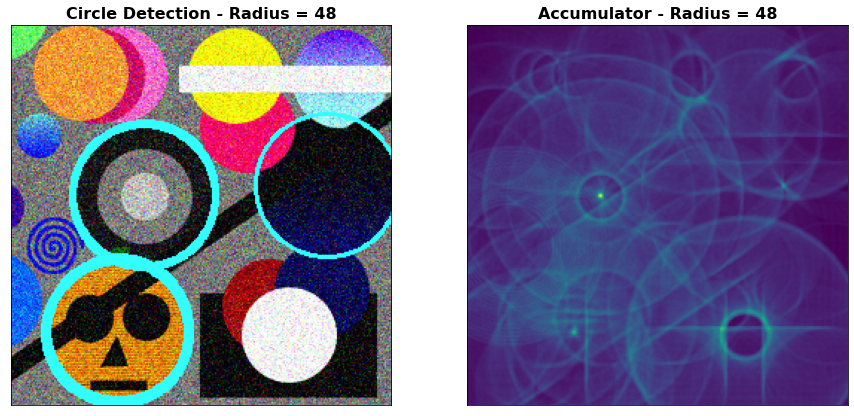

In [14]:
radius = 48
edges = preprocess_image(img, 160)

circles = []
accumulator = np.zeros(edges[0].shape)

for edge in edges:
    chosen_circles, edge_accumulator = hough_circle_detection(edge, radius, vote_cutoff=143)
    circles.append(chosen_circles)
    accumulator += edge_accumulator

# Scale the accumulator values down so that they are between 0 and 255
accumulator = ((accumulator - np.min(accumulator)) * (255 / (np.max(accumulator) - np.min(accumulator))))

final_image = img.copy()

for out_circles in circles:
    for x, y in out_circles:
        final_image = cv2.circle(final_image, (x,y), radius, circle_color, 2)
  
plt.subplot(121)
plt.imshow(cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB))
just_title('Circle Detection - Radius = ' + str(radius))

plt.subplot(122)
plt.imshow(accumulator)
just_title('Accumulator - Radius = ' + str(radius))

##### Part B: Write-up

<span style="color:red">Please describe your results here and any questions, etc. above.</span>



##### This was a tough lab; I still did not perfectly classify all of the circles and unfortunately did not have enough time to try detecting the edge circles.  However, I'm still pretty pleased with my results.  I was able to classify all of the largest circles, 8 of the 12 medium circles with just a single false positive, and 4 of the 5 small cricles, again with just a single false positive.  For the improvements I made, I did the following:
- Used a gaussian blur before performing edge detection
- Used 6 different images for edge detection: blue channel, green channel, red channel, and the averages between each channel pair
- Applied different magnitude thresholds (for the edge detection part) and vote count cutoffs for the various radii; I found that different values seemed to work better/worse depending on the radius size.
- Precomputed (x, y) coordinates on a circle of the given radius before iterating through any edge points.  Once I did start edge iteration, I simply shifted the (x, y) coordinate of an edge by any precomputed circle (x, y) coordinate in order to find a possible center coordinate.  Then like normal I used an accumulator to vote on the potential center point.